In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
# bs = 64
bs = 16
# bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart

In [4]:
path_base = 'parallel_images_data/'
path_train = 'images_png/'
path_img = path_base + path_train
fnames = get_image_files(path_img)
fnames[:5]

[WindowsPath('parallel_images_data/images_png/0.jpg'),
 WindowsPath('parallel_images_data/images_png/0.png'),
 WindowsPath('parallel_images_data/images_png/1.jpg'),
 WindowsPath('parallel_images_data/images_png/1.png'),
 WindowsPath('parallel_images_data/images_png/10.jpg')]

In [5]:
labelsfile = path_base + 'labels_png.csv'
df = pd.read_csv(labelsfile)
#df = df.replace(to_replace=1, value='yes')
#df = df.replace(to_replace=0, value='no')
df.head()

,filename,has_parallel_sides,angle_z,pos_x,pos_y
0,images_png\0.png,no,62.408737,54.297082,47.647638
1,images_png\1.png,no,35.671662,53.911140,46.335141
2,images_png\2.png,no,32.899796,54.717787,54.435396
3,images_png\3.png,yes,-64.102074,48.289527,50.227556
4,images_png\4.png,yes,-50.513071,51.607174,53.043673


In [7]:
#df = df['has_parallel_sides'].fillna('no_parallel_sides')
tfms = get_transforms(do_flip=False, max_warp=0.)

In [8]:
data = (ImageList.from_csv(path_base, 'labels_png.csv')
       .split_by_rand_pct(0.2)
       .label_from_df(cols='has_parallel_sides', label_delim=' ')
       .add_test_folder()
       .transform(tfms, size=128)
       .databunch()
       .normalize())

In [ ]:
tfms = get_transforms(do_flip=False, max_warp=0.)
#data = (src.transform(tfms, size=128)
#        .databunch().normalize(imagenet_stats))
#data = src.transform(tfms, size=128).databunch()
#data = src.transform(size=128).databunch().normalize()
#data = ImageDataBunch.()
#data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs
#                                  ).normalize(imagenet_stats)

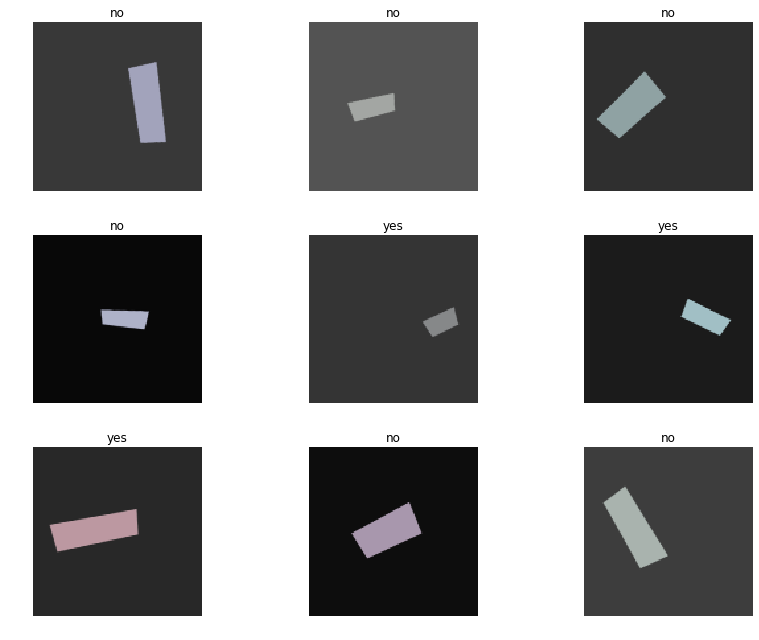

In [16]:
data.show_batch(rows=3, figsize=(12,9))

In [9]:
arch = models.resnet34
torch.cuda.is_available()

True

In [10]:
print(data.classes)
len(data.classes),data.c

['no', 'yes']


(2, 2)

In [11]:
learn = cnn_learner(data, arch)

In [12]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


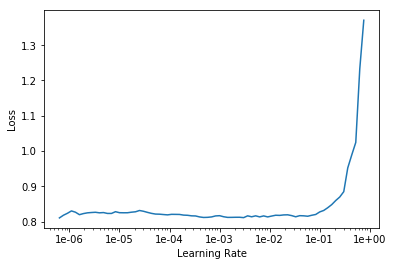

In [13]:
learn.recorder.plot()

In [21]:
lr = 0.001

In [22]:
learn.fit(20, slice(lr))

epoch,train_loss,valid_loss,time
0,0.766704,12.506844,02:06
1,0.713952,29.903723,02:06
2,0.710350,0.828356,02:07
3,0.693537,4.454361,02:06
4,0.682967,13.806990,02:07
5,0.678879,14.320966,02:07
6,0.666156,9.615444,02:06
7,0.668088,0.664751,02:07
8,0.663957,1.753235,02:06
9,0.663785,9.068076,02:06


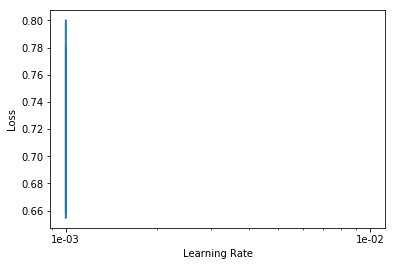

In [23]:
learn.recorder.plot()

In [ ]:
path_train = 'images_jpg/'